## Imports

In [244]:
import numpy as np
import sys
import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import socket
import pyFAI as pf
from pyFAI.gui import jupyter
from pyFAI.gui.jupyter.calib import Calibration

from tqdm import tqdm

import sys
from pathlib import Path

# import ana_fun as ana

from utilities import *

print(f"PyFAI version {pf.version}")


PyFAI version 0.21.3


In [248]:
# constants
h = 4.135667516*1e-18 # kev*sec
c = 3*1e8 # m/s

# setup
sdd = 4.3 # sample-detector distance in meters
energy = 9.5 # energy of the x-rays in keV
wavelength = h*c/energy*1e10 # wavelength of the x-rays (A-1)
beamstop_radius = 1.5e-3 # meter

# epix params
epix_pixel_size = 50e-6 # meter
epix_npixel = (704, 768)
epix_center = (int(epix_npixel[0]/2), int(epix_npixel[0]/2))

# smalldata path
exp = 'xppl1001021'
p = Path('/sdf/data/lcls/ds/{}/{}'.format(exp[:3], exp))
smalldata = Path(p, 'hdf5', 'smalldata')
jungfrau_iq = Path(shared, 'jungfrau_Iq')
results = Path(p, 'results')
shared = Path(results, 'shared')
print('Smalldata path exists:', jungfrau_data.exists())

Smalldata path exists: True


In [237]:
ds = psana.MPIDataSource('exp=xppl1001021:run={}:smd'.format(run))
detname = 'epix_alc5'
det = psana.Detector(detname) 
delay_stage_location = psana.Detector('sd_delay')
delays = []
dsl_value = []
for nevt,evt in tqdm(enumerate(ds.events())):
    dsl_value.append(delay_stage_location(evt))
    delays.append((0.939 * (delay_stage_location(evt) - 6.96)))

40003it [01:05, 612.81it/s]


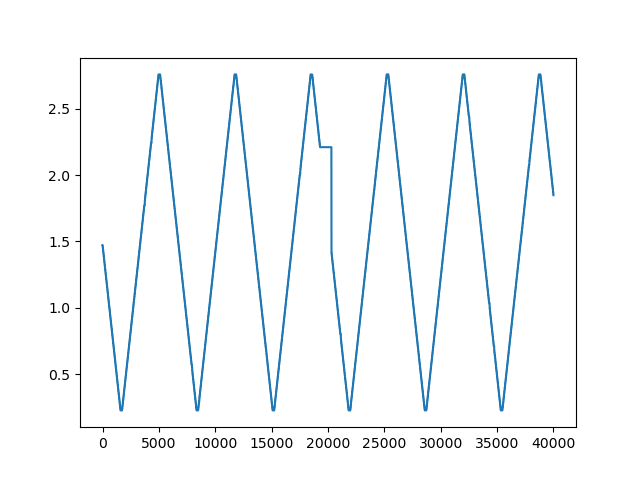

In [240]:
plt.close()
plt.plot(delays)
plt.show()

In [241]:
_d = np.asarray(delays)
_d[_d<0].shape

(0,)

## Load Off Jet I(q)

In [32]:
# Run & experiment number
run = 92

# path to run
f = Path(jungfrau_iq, f'run{run}_Iq.h5')
with h5py.File(f) as h5:
    print(h5.visititems(visit_func))

	 /Iq (2219, 1024)
	 /common_q (1024,)
/ebeam
	 /ebeam/L3_energy (2219,)
	 /ebeam/LTU_250 (2219,)
	 /ebeam/LTU_450 (2219,)
	 /ebeam/LTU_ang_x (2219,)
	 /ebeam/LTU_ang_y (2219,)
	 /ebeam/LTU_pos_x (2219,)
	 /ebeam/LTU_pos_y (2219,)
	 /ebeam/XTCAV_ampl (2219,)
	 /ebeam/XTCAV_phase (2219,)
	 /ebeam/charge (2219,)
	 /ebeam/dump_charge (2219,)
	 /ebeam/photon_energy (2219,)
	 /ebeam/pk_curr_bc2 (2219,)
	 /ebeam/und_ang_x (2219,)
	 /ebeam/und_ang_y (2219,)
	 /ebeam/und_pos_x (2219,)
	 /ebeam/und_pos_y (2219,)
	 /event_time (2219,)
/evr
	 /evr/code_119 (2219,)
	 /evr/code_120 (2219,)
	 /evr/code_137 (2219,)
	 /evr/code_138 (2219,)
	 /evr/code_139 (2219,)
	 /evr/code_140 (2219,)
	 /evr/code_141 (2219,)
	 /evr/code_142 (2219,)
	 /evr/code_143 (2219,)
	 /evr/code_144 (2219,)
	 /evr/code_145 (2219,)
	 /evr/code_146 (2219,)
	 /evr/code_150 (2219,)
	 /evr/code_162 (2219,)
	 /evr/code_164 (2219,)
	 /evr/code_190 (2219,)
	 /evr/code_191 (2219,)
	 /evr/code_193 (2219,)
	 /evr/code_194 (2219,)
	 /evr/c

In [33]:
with h5py.File(f) as h5:
    Iq_bg = h5['Iq'][:]

## Load I(q)

In [249]:
# Run & experiment number
run = 119

# path to run
f = Path(jungfrau_iq, f'run{run}_Iq.h5')
with h5py.File(f) as h5:
    print(h5.visititems(visit_func))

	 /Iq (40003, 1024)
	 /common_q (1024,)
	 /delay_ps (40003,)
/ebeam
	 /ebeam/L3_energy (40003,)
	 /ebeam/LTU_250 (40003,)
	 /ebeam/LTU_450 (40003,)
	 /ebeam/LTU_ang_x (40003,)
	 /ebeam/LTU_ang_y (40003,)
	 /ebeam/LTU_pos_x (40003,)
	 /ebeam/LTU_pos_y (40003,)
	 /ebeam/XTCAV_ampl (40003,)
	 /ebeam/XTCAV_phase (40003,)
	 /ebeam/charge (40003,)
	 /ebeam/dump_charge (40003,)
	 /ebeam/photon_energy (40003,)
	 /ebeam/pk_curr_bc2 (40003,)
	 /ebeam/und_ang_x (40003,)
	 /ebeam/und_ang_y (40003,)
	 /ebeam/und_pos_x (40003,)
	 /ebeam/und_pos_y (40003,)
	 /event_time (40003,)
/evr
	 /evr/code_119 (40003,)
	 /evr/code_120 (40003,)
	 /evr/code_137 (40003,)
	 /evr/code_138 (40003,)
	 /evr/code_139 (40003,)
	 /evr/code_140 (40003,)
	 /evr/code_141 (40003,)
	 /evr/code_142 (40003,)
	 /evr/code_143 (40003,)
	 /evr/code_144 (40003,)
	 /evr/code_145 (40003,)
	 /evr/code_146 (40003,)
	 /evr/code_150 (40003,)
	 /evr/code_162 (40003,)
	 /evr/code_164 (40003,)
	 /evr/code_190 (40003,)
	 /evr/code_191 (40003,)

In [271]:
with h5py.File(f) as h5:
    Iq = h5['Iq'][:]
    q = h5['common_q'][:]
    delays = h5['delay_ps'][:]

In [251]:
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [273]:
from scipy.optimize import curve_fit

# shots = [i for i in range(Iq.shape[0]) if i % 1000 == 0]
peak_positions = np.zeros((Iq.shape[0],))
peak_positions_errors = np.zeros((Iq.shape[0],))
Iq_without_bg = np.zeros((Iq.shape))
bg = Iq_bg.mean(0)

for shot in tqdm(range(Iq.shape[0])):
    x = np.linspace(1.3,1.6,100)
    s = Iq[shot].mean(0) - bg
    Iq_without_bg[shot] = s
    # plt.plot(q[(s>0)], s[(s>0)], alpha=0.3)

    # fit peak with a gaussian
    
    try:
        popt, pcov = curve_fit(
            gauss_function, 
            q[(q>1.3)&(q<1.6)], s[(q>1.3)&(q<1.6)], 
            p0 = [0.2, 1.5, 0.2]
        )
        perr = np.sqrt(np.diag(pcov))
        peak_pos, peak_err = popt[1], perr[1]
    except RuntimeError:
        popt, pcov, perr = np.nan, np.nan, np.nan
        peak_pos, peak_err = np.nan, np.nan

    peak_positions[shot] = peak_pos
    peak_positions_errors[shot] = peak_err

100%|██████████| 40003/40003 [03:33<00:00, 187.73it/s]


In [254]:
np.save(Path(shared, "output", "Iq_peak_positions_run119.npy"), np.asarray([peak_positions, peak_positions_errors]))

In [274]:
np.save(Path(shared, "output", "Iq_background_subtracted_run119.npy"), Iq_without_bg)

41it [00:00, 315.53it/s]


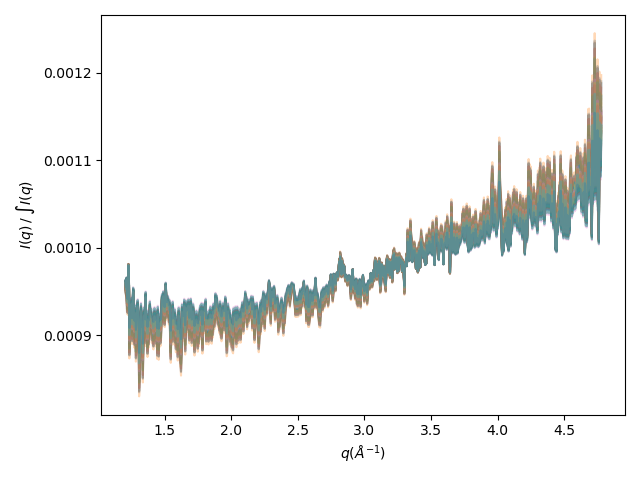

In [275]:
plt.close()
shots = [i for i in range(Iq.shape[0]) if i % 1000 == 0]
for idx, shot in tqdm(enumerate(shots)):
    x = np.linspace(1.3,1.6,100)
    s = Iq_without_bg[shot:shot+1000].mean(0) - bg
    plt.plot(q[(s>0)], s[(s>0)]/np.sum(s[(s>0)]), alpha=0.3)
plt.xlabel(r"$q (\AA^{-1})$")
plt.ylabel(r"$I(q) \: / \: \int I(q)$")
plt.tight_layout()
plt.show()

In [276]:
peak_positions[np.logical_not(np.isnan(peak_positions))]

array([1.4911707 , 1.47787607, 1.47753987, ..., 1.47745504, 1.47750282,
       1.47745975])

In [277]:
import xarray as xr

In [278]:
peak_xr = xr.DataArray(peak_positions).assign_coords({'dim_0':delays}).rename({'dim_0':'delay'})

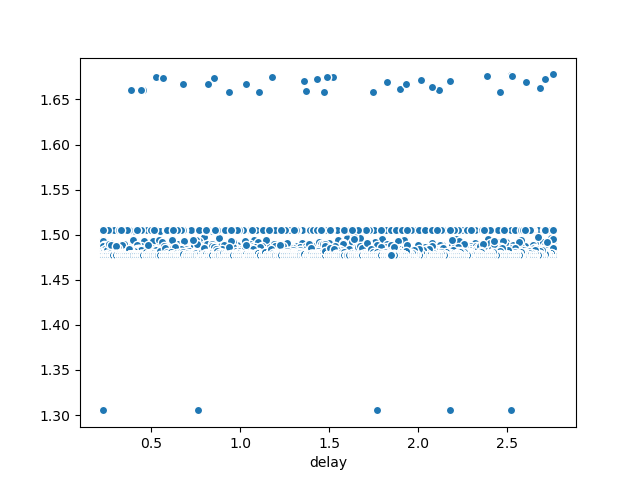

In [279]:
plt.close()
peak_xr.plot.scatter()
plt.show()

In [280]:
mean_peak_pos = peak_xr.groupby_bins('delay',70).mean()

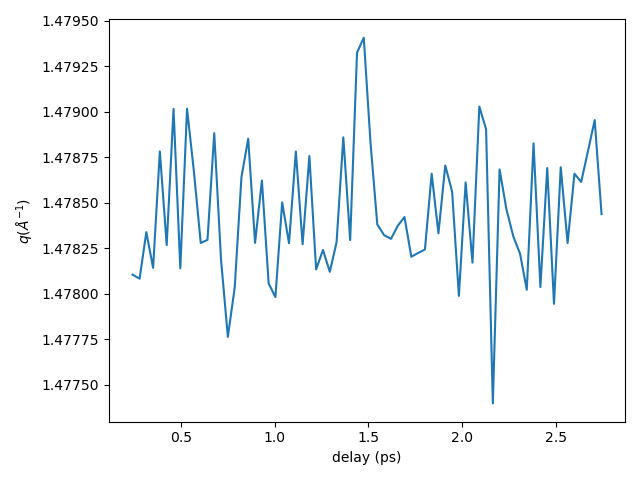

In [281]:
plt.close()
fig, ax = plt.subplots(tight_layout=True)
x = mean_peak_pos.values
bins = [mean_peak_pos.delay_bins.values[i].mid for i in range(len(x))]
mean_peak_pos.plot()
ax.set_xlabel("delay (ps)")
ax.set_ylabel(r"$q (\AA^{-1})$")
# ax.xaxis.set_major_formatter('{x:.1f}')
plt.show()

In [ ]:
Iq_without_bg